# Delimiting lines with a list

I have a list and I want to segment each row, this code will help me to do that.

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,914 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [2]:
#import libraries

import cv2
import pytesseract
import numpy as np
from google.colab.patches import cv2_imshow

## 1st test

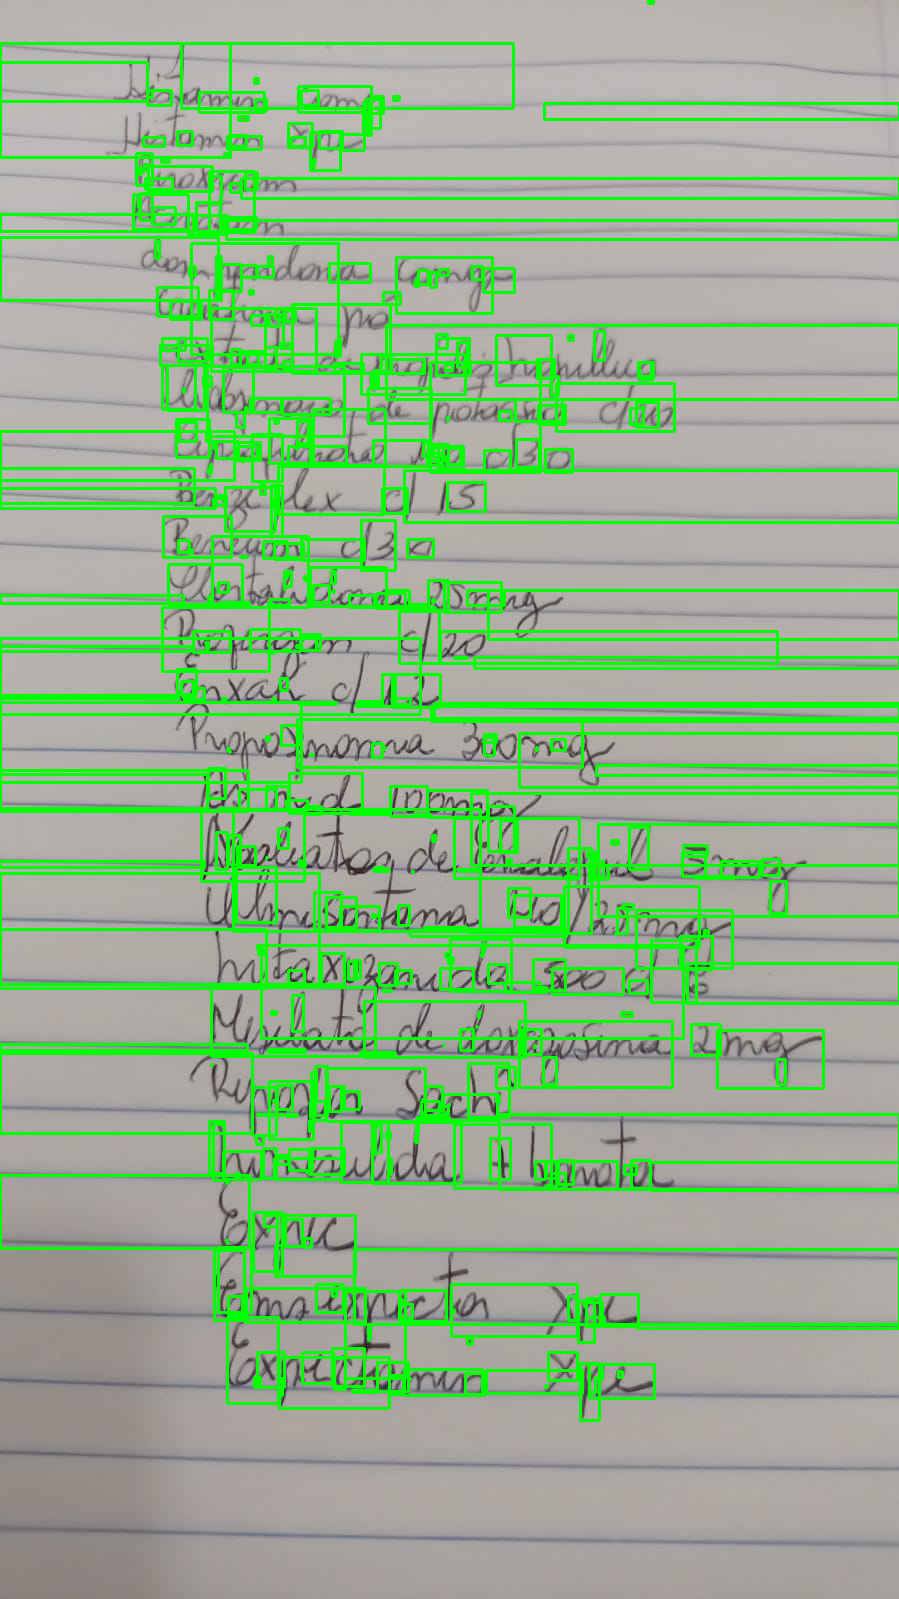

In [ ]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/DataScience/OCR/example/lista.jpeg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection on the grayscale image
edges = cv2.Canny(gray_image, 50, 150)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours from left to right and top to bottom
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])

# Iterate over the contours
for contour in contours:
    # Get the bounding rectangle coordinates of the contour
    x, y, width, height = cv2.boundingRect(contour)

    # Draw the bounding rectangle on the original image
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Extract the corresponding part of the image
    line = image[y:y+height, x:x+width]

    # Do something with the extracted line image, e.g., save to a file
    cv2.imwrite("/content/drive/MyDrive/DataScience/OCR/example/lista_line.jpg", line)

# Show the image with the delimited lines
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


we see that he did the segmentation but did not identify line by line

## 2st test

This approach uses a combination of adaptive thresholding and morphological operations to segment the rows in the shopping list. First, the image is converted to grayscale and then adaptive thresholding is applied to create a binary image where lines are highlighted. Then a close operation is applied to join nearby regions. Contours are found in the resulting binary image, and then bounding rectangles are drawn around each line. The parts corresponding to the lines are extracted and can be saved in separate files.

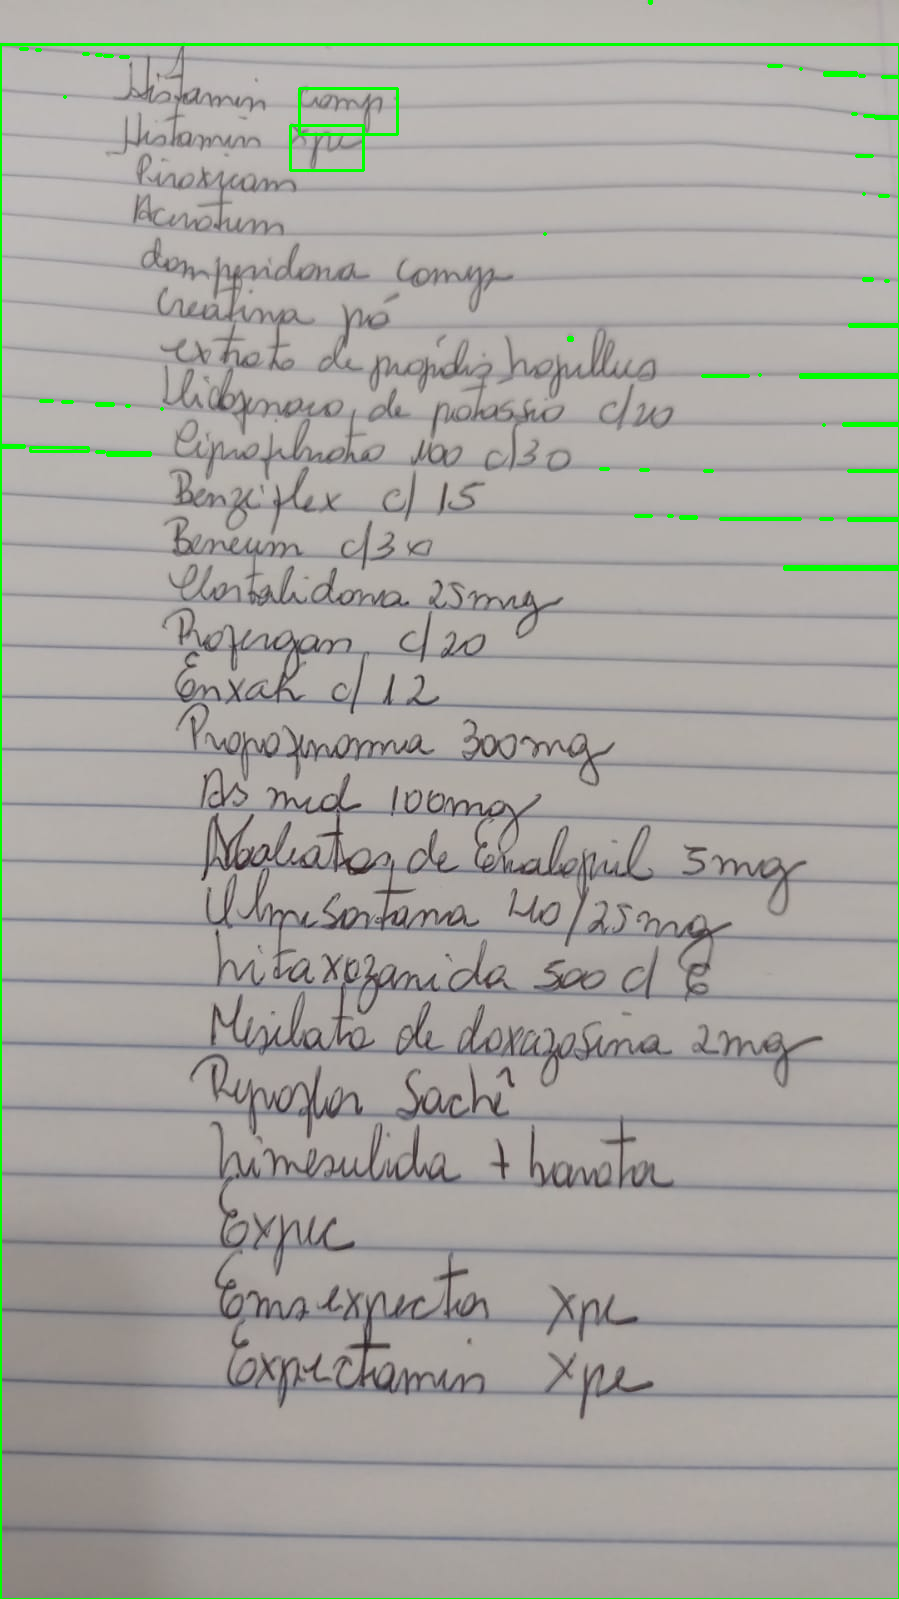

In [ ]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/DataScience/OCR/example/lista.jpeg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to segment the lines
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Apply a closing operation to join nearby regions
kernel = np.ones((20, 15), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours from left to right and top to bottom
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])

# Iterate over the contours
for contour in contours:
    # Get the bounding rectangle coordinates of the contour
    x, y, width, height = cv2.boundingRect(contour)

    # Draw the bounding rectangle on the original image
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Extract the corresponding part of the image
    line = image[y:y+height, x:x+width]

    # Do something with the extracted line image, e.g., save to a file
    cv2.imwrite("/content/drive/MyDrive/DataScience/OCR/example/lista_line2.jpg", line)

# Show the image with the delimited lines
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


We see that he only managed to segment into parts which is not yet what we want

## 3st test

If the image contains several lines and the previous method is not correctly segmenting all of them, we can try a different approach using line detection using the Hough transform. In this approach, we apply a line detection using the Hough transform to identify the lines present in the image. Then we draw the lines found in the original image and extract the parts corresponding to each line.

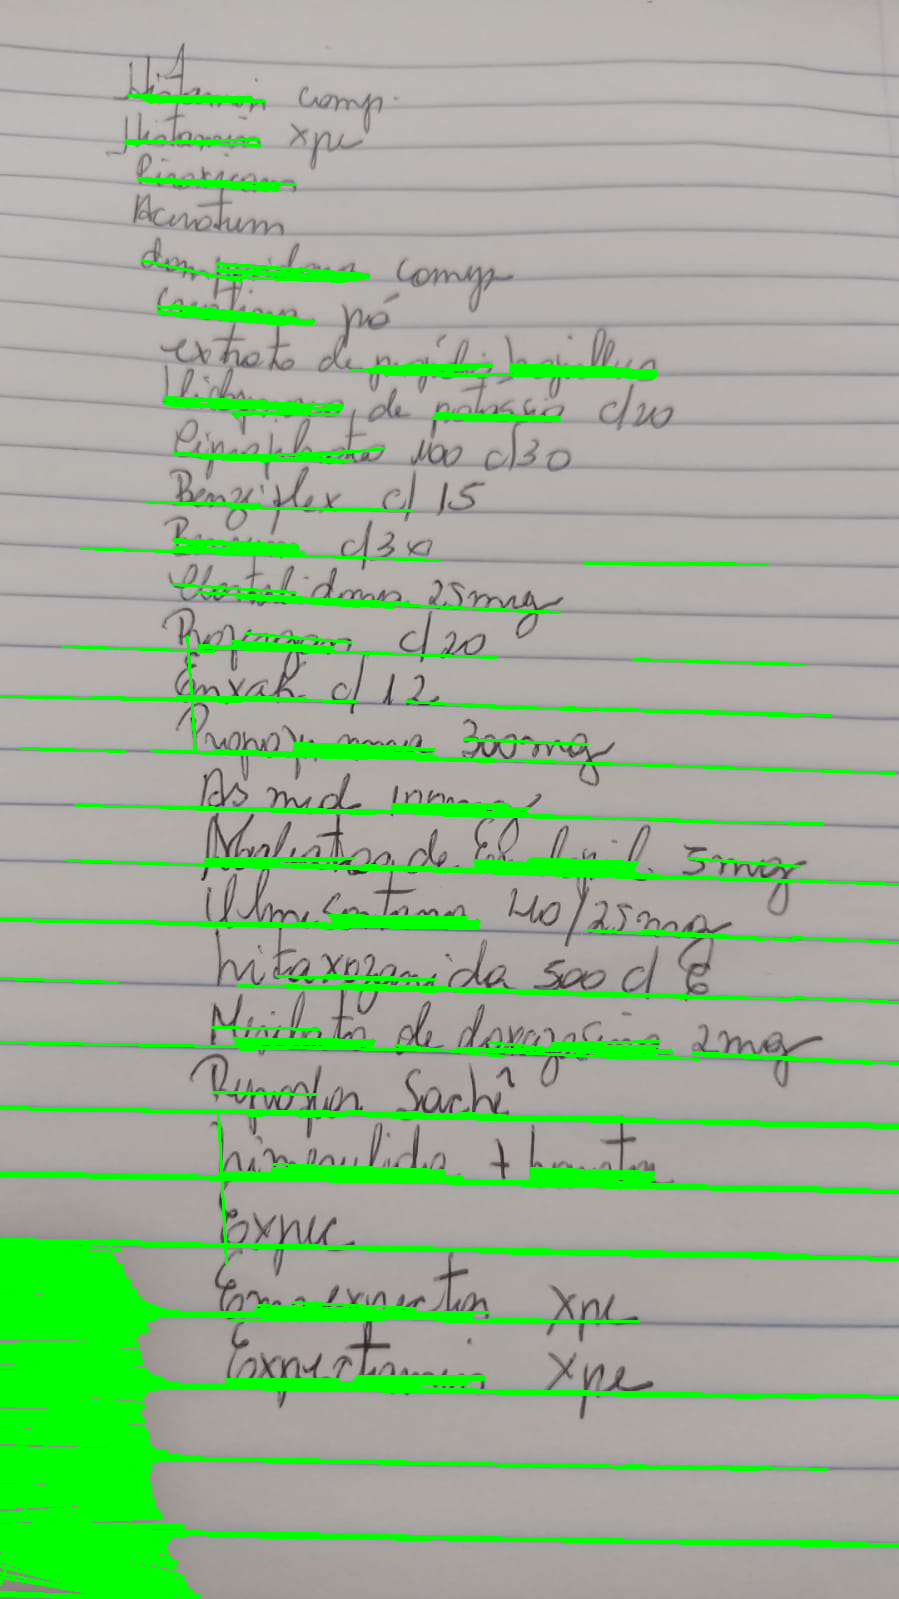

In [ ]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/DataScience/OCR/example/lista.jpeg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to segment the lines
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Apply a closing operation to join nearby regions
kernel = np.ones((5, 5), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Detect lines in the binary image using Hough transform
lines = cv2.HoughLinesP(binary_image, 1, np.pi / 180, threshold=10, minLineLength=100, maxLineGap=10)

# Iterate over the detected lines
for line in lines:
    x1, y1, x2, y2 = line[0]

    # Draw the line on the original image
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Extract the corresponding part of the line
    extracted_line = image[y1:y2, x1:x2]

# Show the image with the delimited lines
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


this one managed to identify more lines in relation to previous models.

## 4st test

We can modify the previous code to draw a rectangle around each line and extract the corresponding product image within that rectangle.

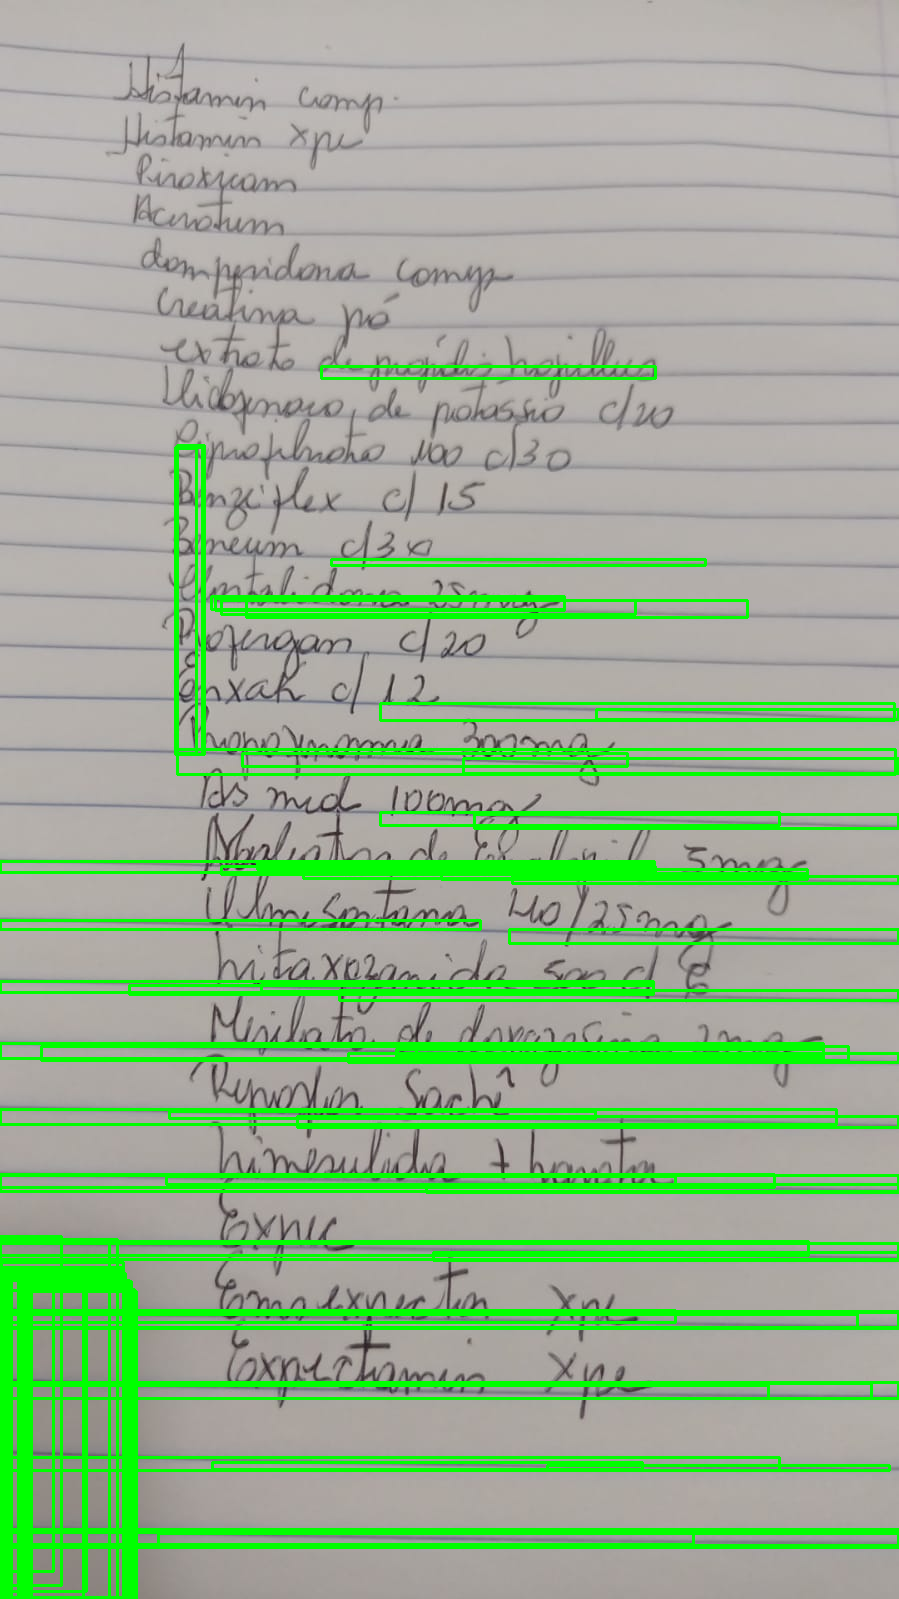

In [ ]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/DataScience/OCR/example/lista.jpeg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to segment the lines
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Apply a closing operation to join nearby regions
kernel = np.ones((20, 20), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Detect lines in the binary image using Hough transform
lines = cv2.HoughLinesP(binary_image, 1, np.pi /180, threshold=100,
                        minLineLength=300, maxLineGap=10)


# Iterate over the detected lines
for line in lines:
    x1, y1, x2, y2 = line[0]

    # Draw a rectangle around the line
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Extract the corresponding product image within the rectangle
    product_image = image[y1:y2, x1:x2]

# Show the image with the delimited lines and rectangles
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## 5st test

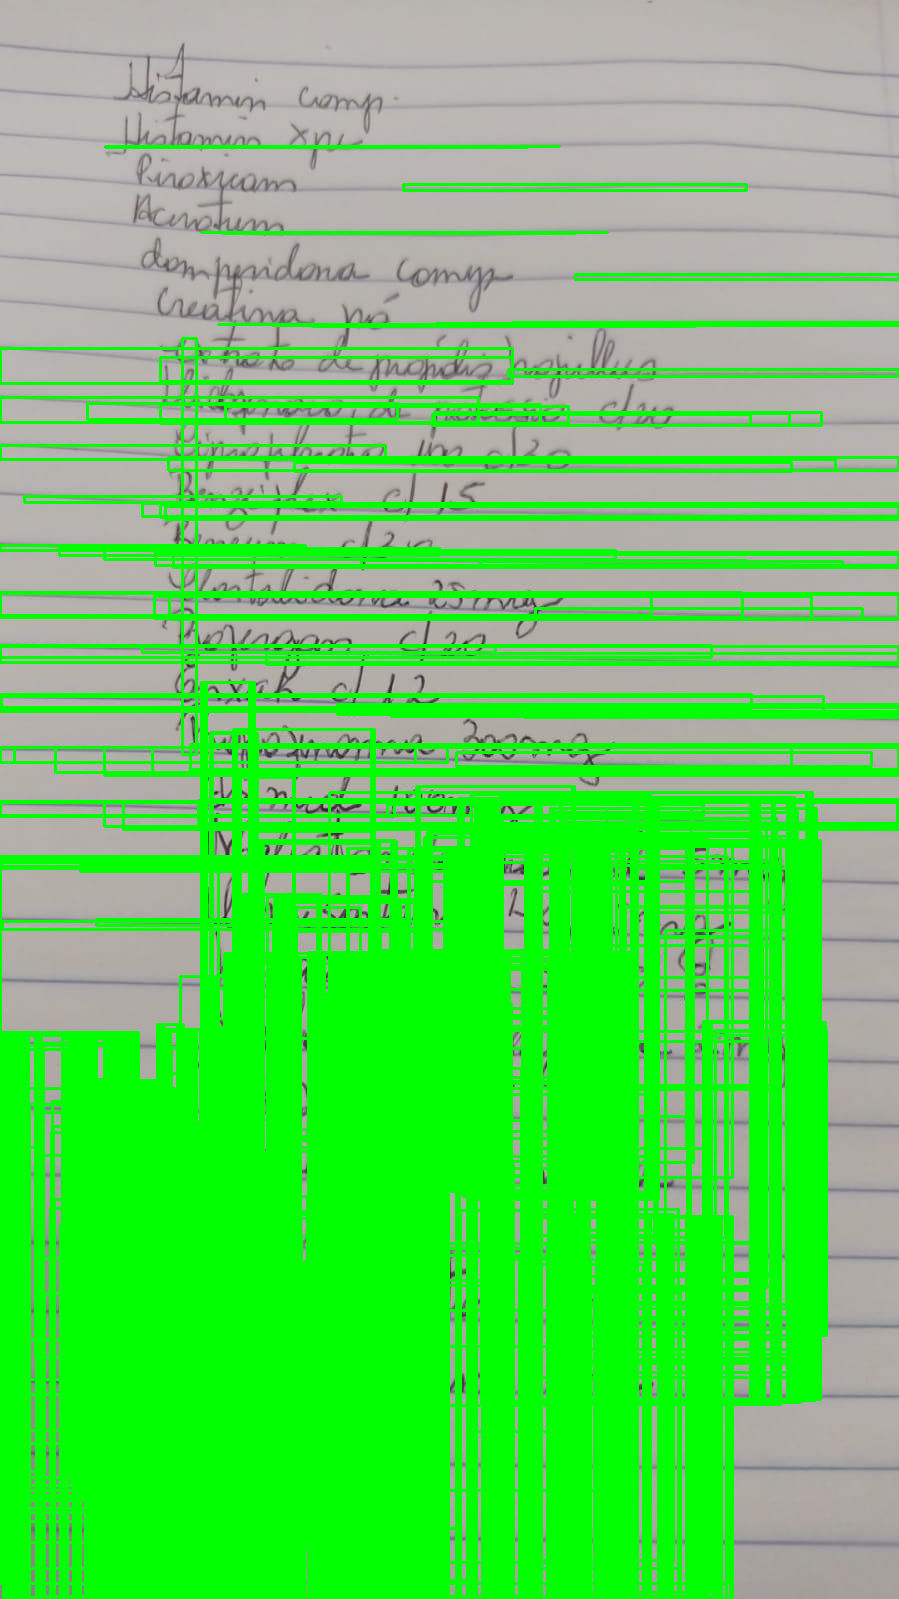

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("/content/drive/MyDrive/DataScience/OCR/example/lista.jpeg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization to enhance contrast
equalized_image = cv2.equalizeHist(gray_image)

# Apply adaptive thresholding to segment the lines
_, binary_image = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Apply a closing operation to join nearby regions
kernel = np.ones((15, 15), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Detect lines in the binary image using Hough transform
lines = cv2.HoughLinesP(binary_image, 1, np.pi / 180, threshold=50,
                        minLineLength=300, maxLineGap=10)

# Iterate over the detected lines
for line in lines:
    x1, y1, x2, y2 = line[0]

    # Draw a rectangle around the line
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Extract the corresponding product image within the rectangle
    product_image = image[y1:y2, x1:x2]

# Show the image with the delimited lines and rectangles
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## 6st test

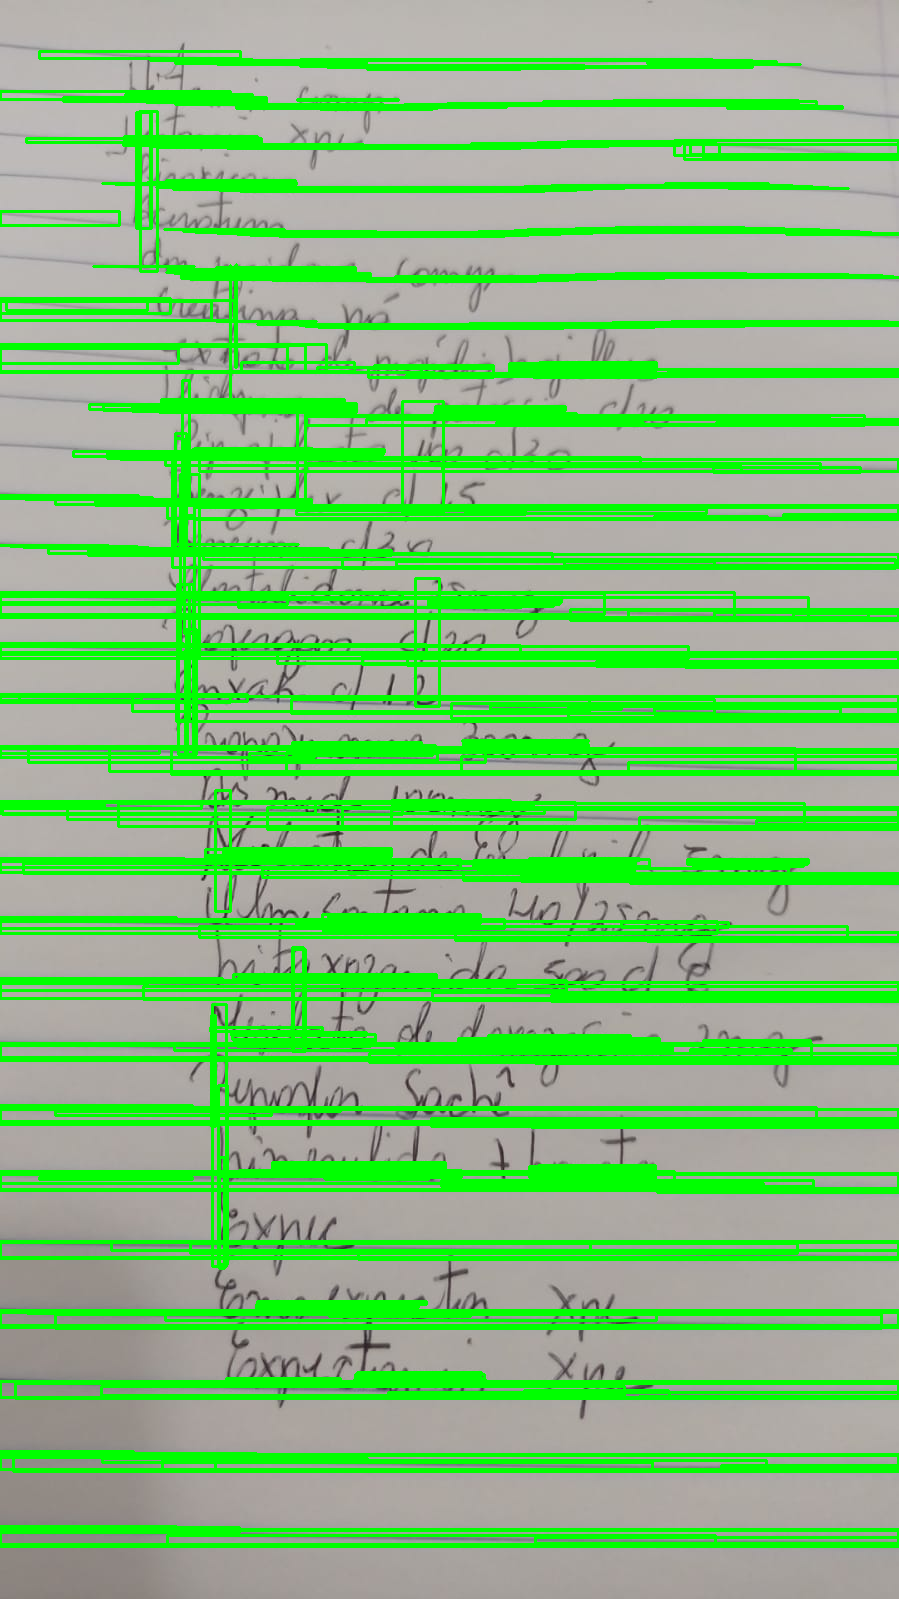

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("/content/drive/MyDrive/DataScience/OCR/example/lista.jpeg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to segment the lines
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, blockSize=15, C=7)

# Apply morphological operations (dilation and erosion) to enhance line segmentation
kernel = np.ones((3, 3), np.uint8)
binary_image = cv2.dilate(binary_image, kernel, iterations=2)
binary_image = cv2.erode(binary_image, kernel, iterations=1)

# Detect lines in the binary image using Hough transform
lines = cv2.HoughLinesP(binary_image, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Iterate over the detected lines
for line in lines:
    x1, y1, x2, y2 = line[0]

    # Draw a rectangle around the line
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Extract the corresponding product image within the rectangle
    product_image = image[y1:y2, x1:x2]


# Show the image with the delimited lines and rectangles
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## 7st test

2st test improvements

With these improvements, the code will apply adaptive thresholding, followed by morphological operations to enhance the line segmentation. Then, contours are found in the binary image, and the bounding rectangles are drawn on the original image. Finally, the corresponding parts of the image are extracted, and you can choose to save them or perform other operations.

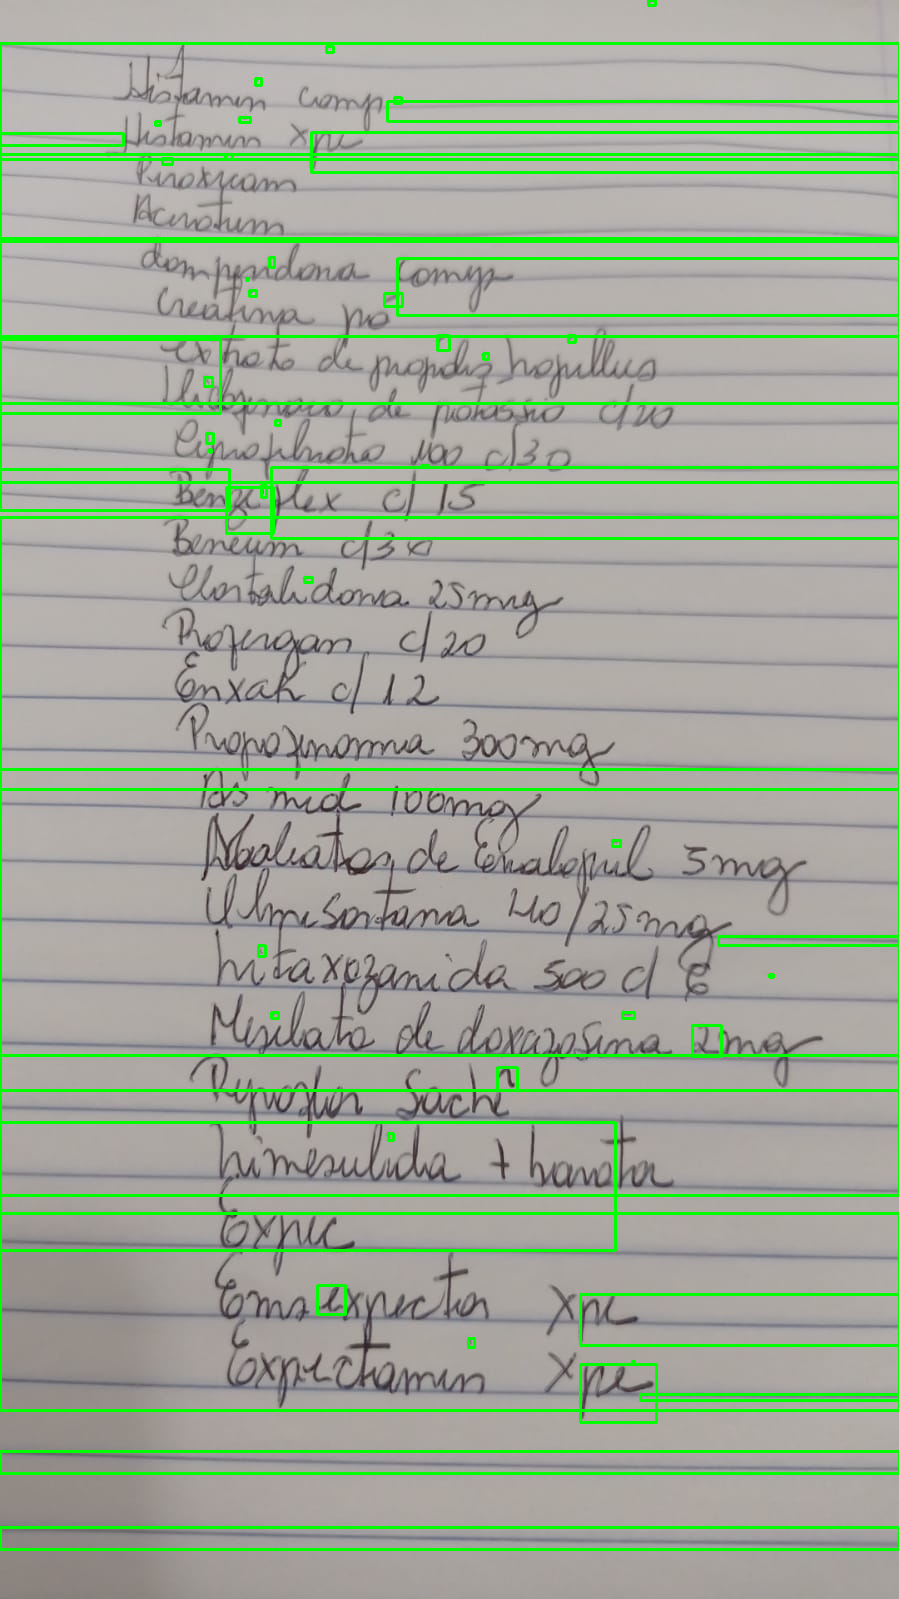

In [ ]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/DataScience/OCR/example/lista.jpeg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to segment the lines
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, blockSize=15, C=7)

# Apply morphological operations (dilation and erosion) to enhance line segmentation
kernel = np.ones((2, 2), np.uint8)
binary_image = cv2.dilate(binary_image, kernel, iterations=2)
binary_image = cv2.erode(binary_image, kernel, iterations=1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours from left to right and top to bottom
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])

# Iterate over the contours
for contour in contours:
    # Get the bounding rectangle coordinates of the contour
    x, y, width, height = cv2.boundingRect(contour)

    # Draw the bounding rectangle on the original image
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Extract the corresponding part of the image
    line = image[y:y+height, x:x+width]

# Show the image with the delimited lines
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## 8st test

using tesseract

If you want to segment rectangles around each line containing text, you can make use of OCR (Optical Character Recognition) to identify the location of the text and then enclose a rectangle around it.

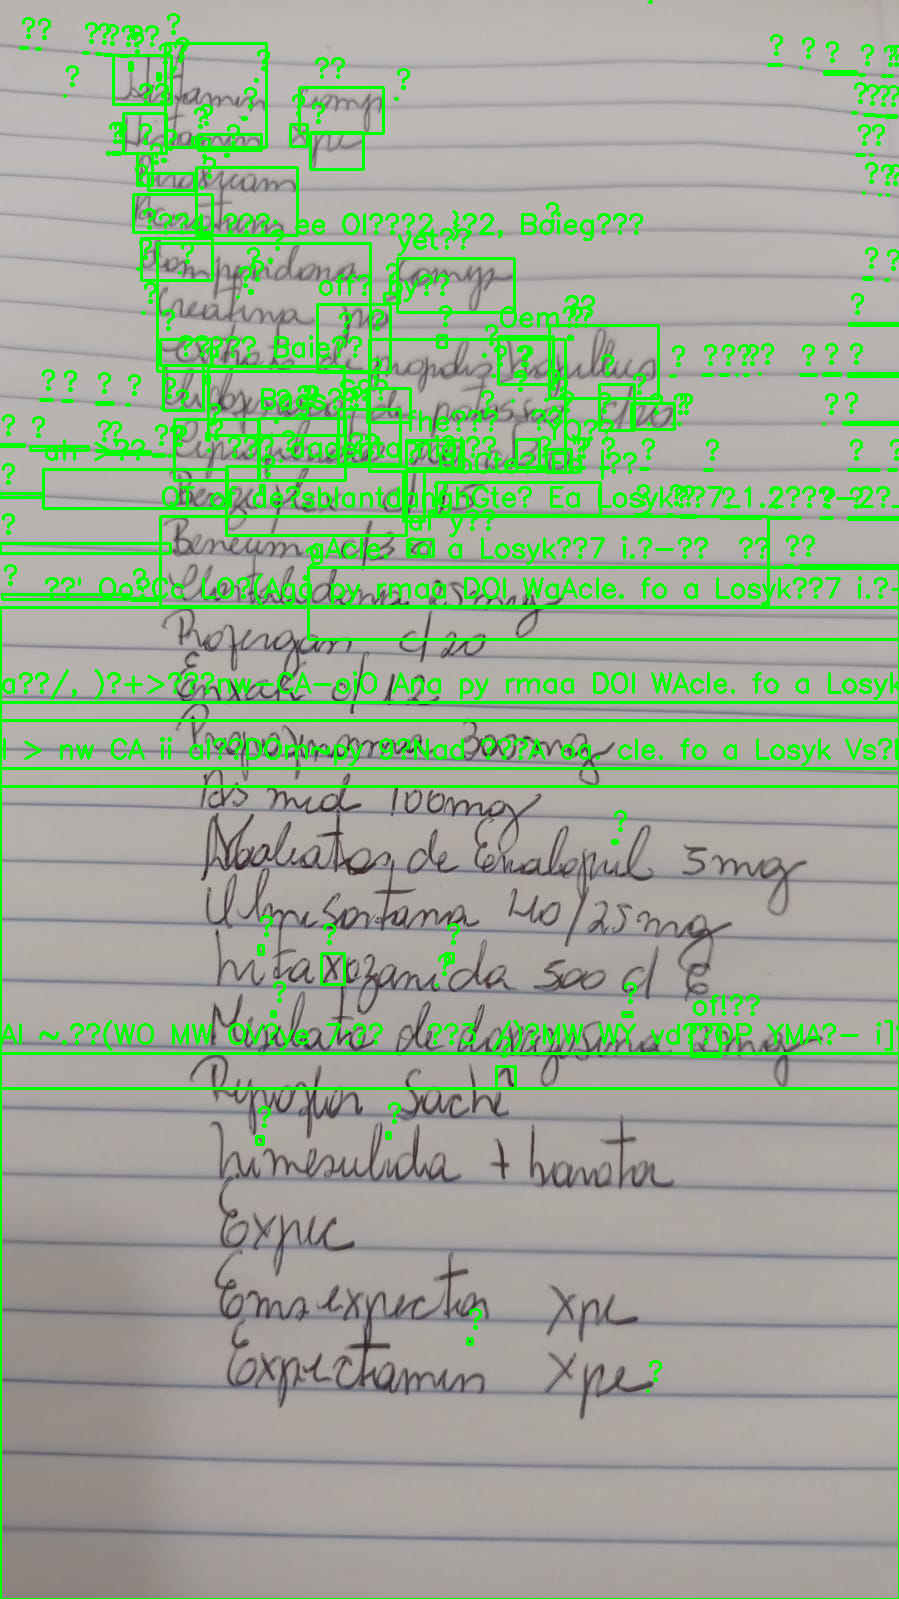

In [ ]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/DataScience/OCR/example/lista.jpeg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to segment the lines
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours
for contour in contours:
    # Get the bounding rectangle coordinates of the contour
    x, y, width, height = cv2.boundingRect(contour)

    # Extract the corresponding part of the image
    line_image = image[y:y+height, x:x+width]

    # Perform OCR on the line image to extract the text
    line_text = pytesseract.image_to_string(line_image, lang='eng')

    # Draw a rectangle around the text
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Draw the extracted text on the image
    cv2.putText(image, line_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Show the image with the delimited rectangles and extracted text
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


even with tesseract it does not identify the text space

## 9st test

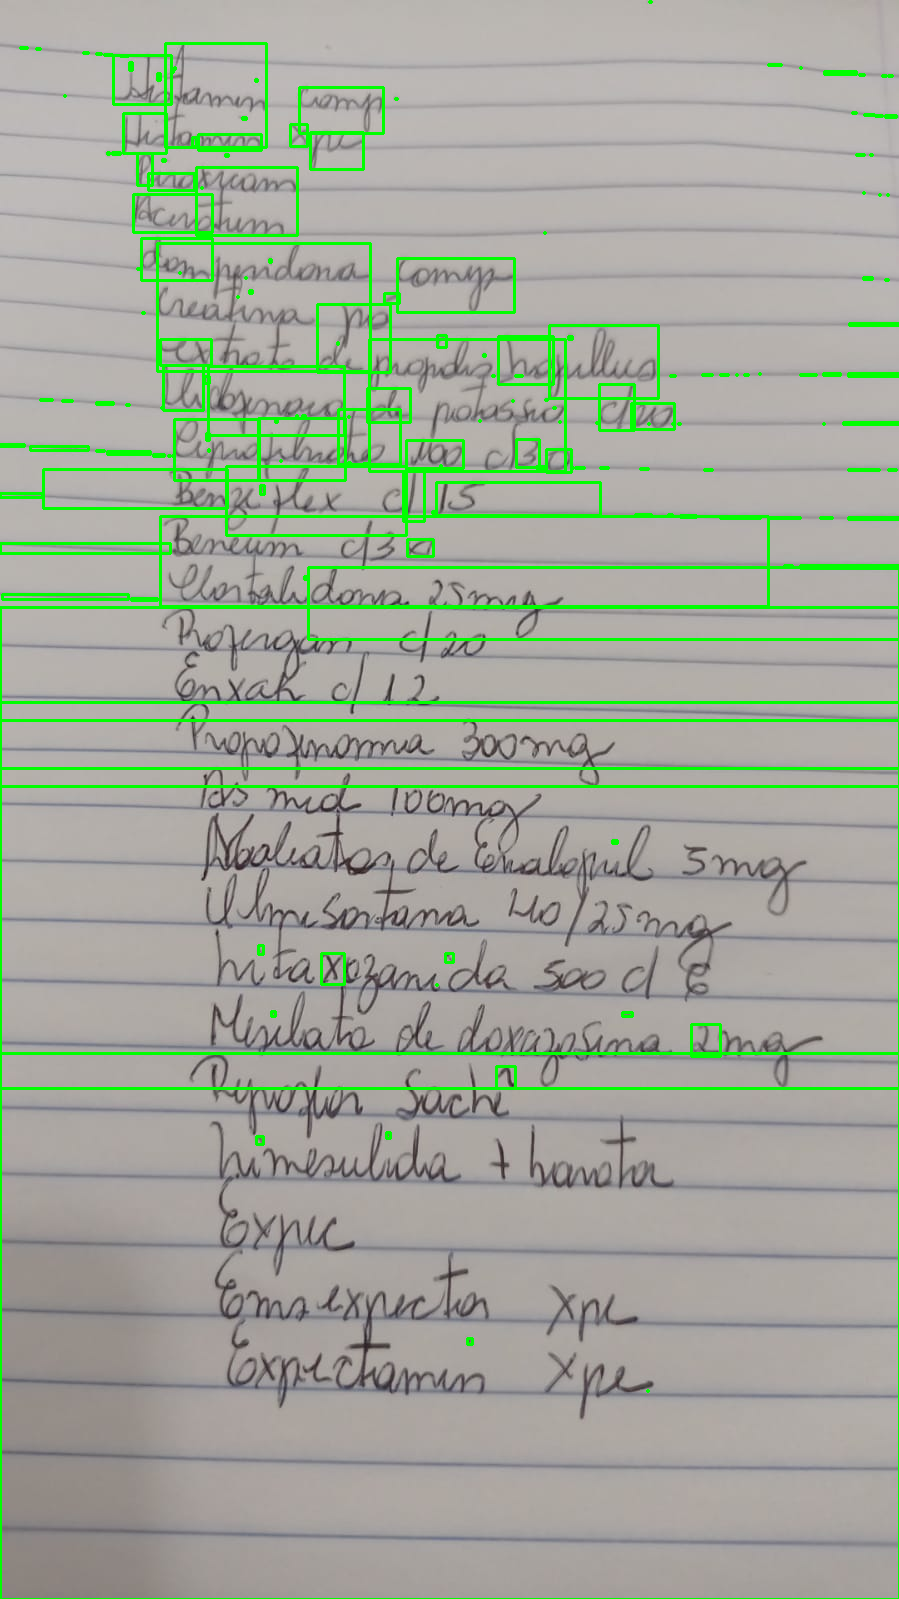

In [ ]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/DataScience/OCR/example/lista.jpeg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to segment the lines
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours
for contour in contours:
    # Get the bounding rectangle coordinates of the contour
    x, y, width, height = cv2.boundingRect(contour)

    # Draw a rectangle around the line
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

# Show the image with the delimited rectangles
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


You can adjust the thresholding parameters or apply other pre-processing to the image, if needed, to get better segmentation results for the lines with text.

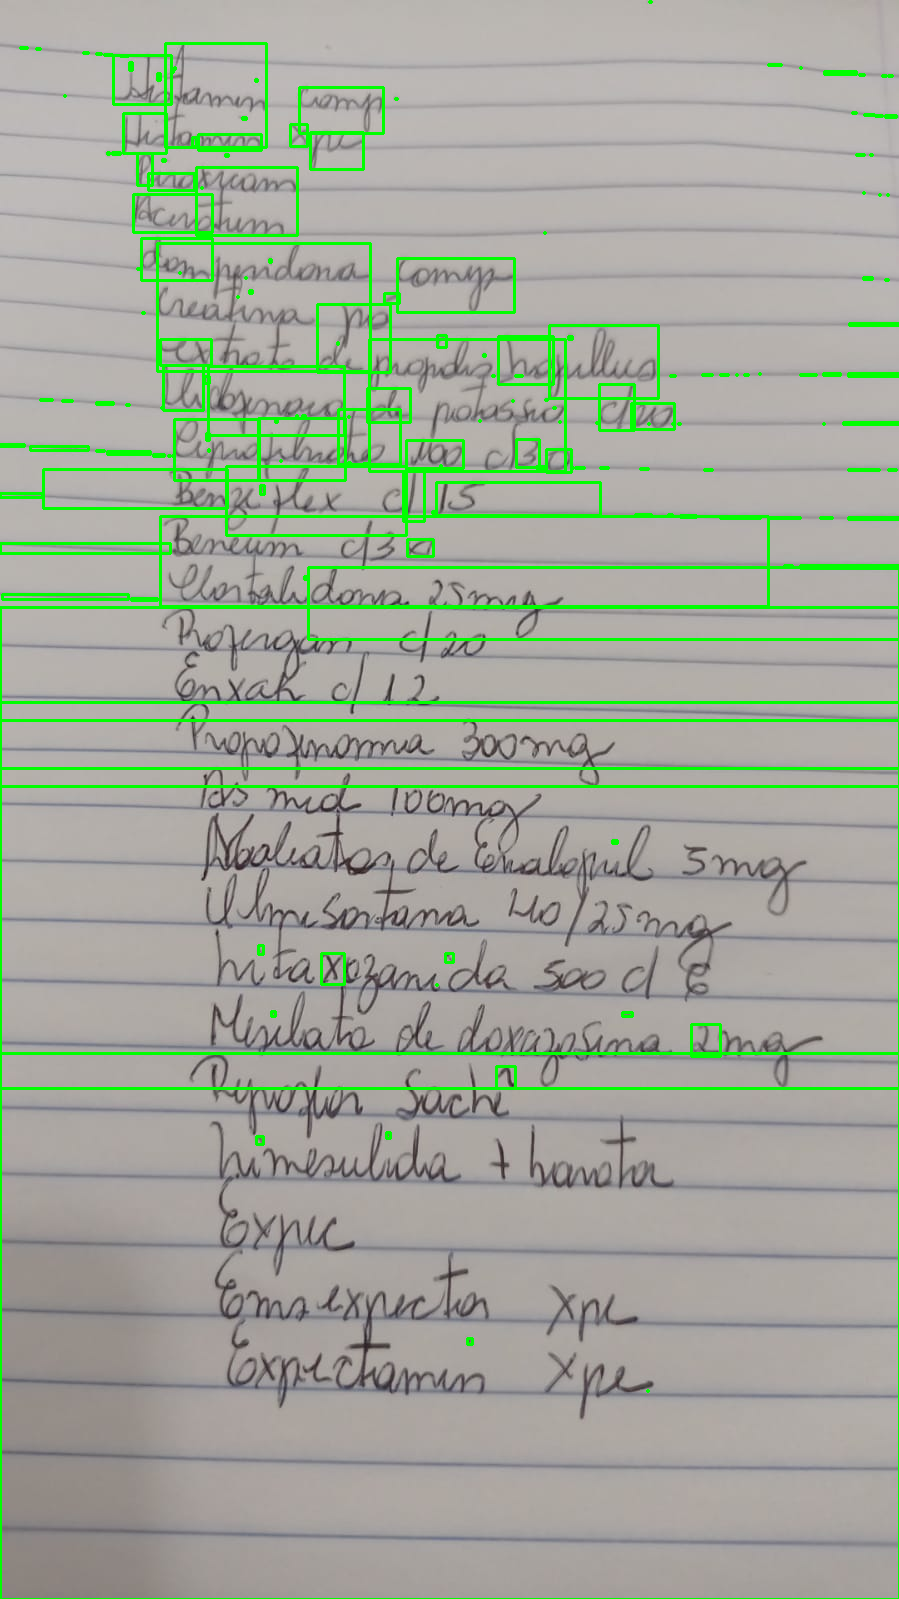

In [ ]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/DataScience/OCR/example/lista.jpeg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply preprocessing steps
# Example: Applying Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (1, 1), 0)

# Apply adaptive thresholding to segment the lines
_, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours
for contour in contours:
    # Get the bounding rectangle coordinates of the contour
    x, y, width, height = cv2.boundingRect(contour)

    # Draw a rectangle around the line
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

# Show the image with the delimited rectangles
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


We haven't gotten a better result yet but it serves as a starting point.

## 10st test

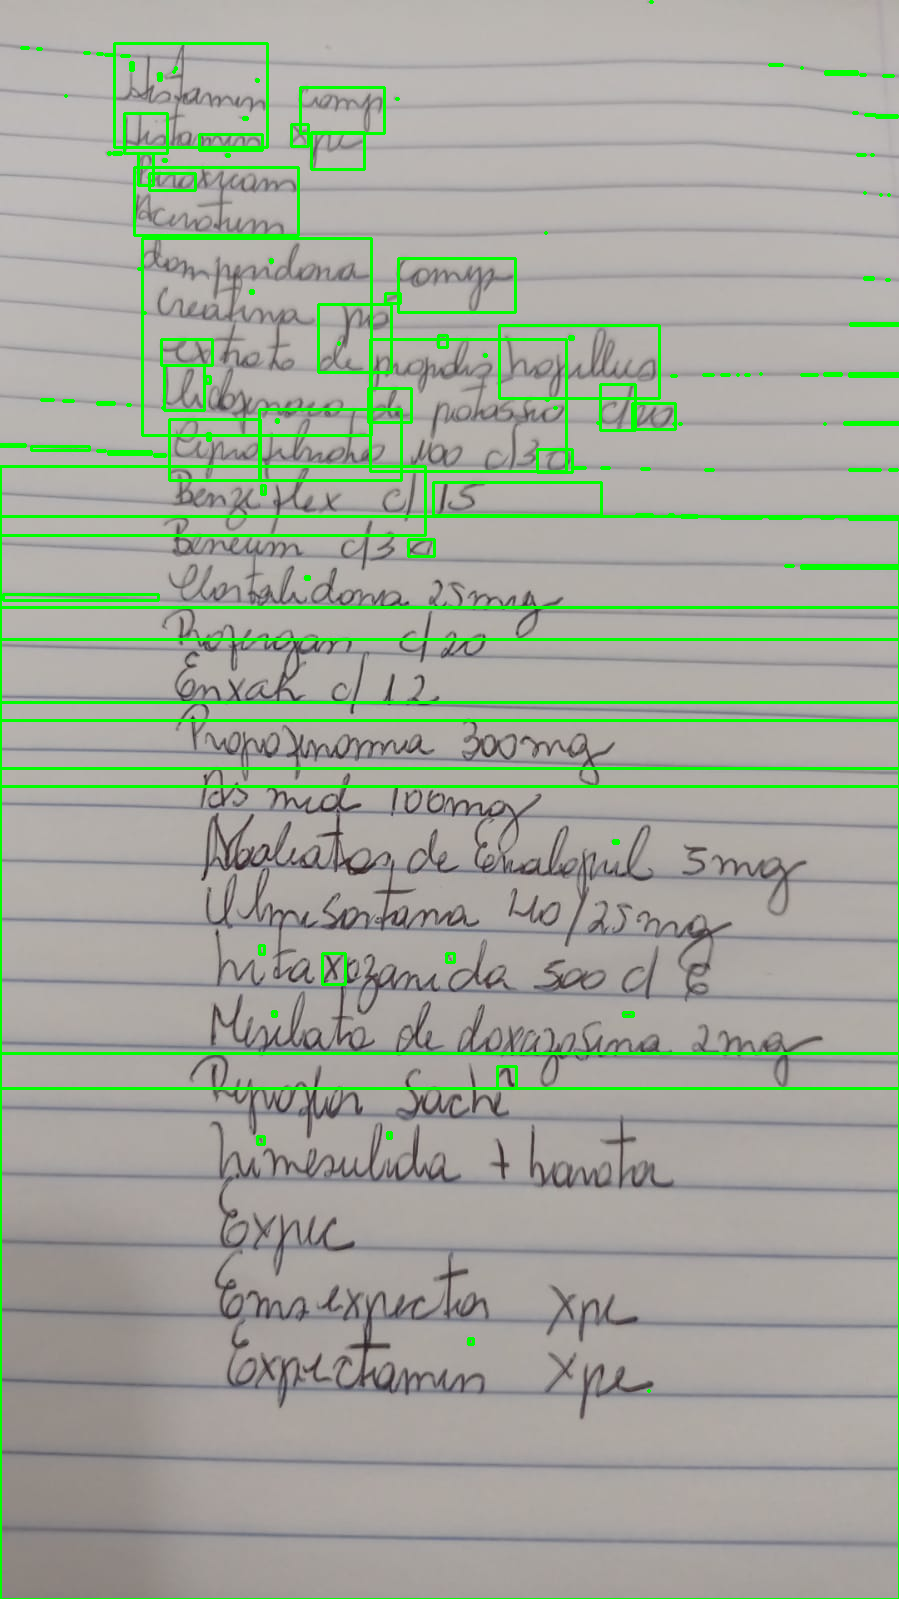

In [21]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/DataScience/OCR/example/lista.jpeg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to segment the text regions
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Apply a closing operation to join nearby regions
kernel = np.ones((1, 4), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours from left to right and top to bottom
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])

# Iterate over the contours
for contour in contours:
    # Get the bounding rectangle coordinates of the contour
    x, y, width, height = cv2.boundingRect(contour)

    # Draw the bounding rectangle on the original image
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Extract the corresponding part of the image
    word = image[y:y+height, x:x+width]

    # Do something with the extracted word image, e.g., save to a file
    cv2.imwrite("/content/drive/MyDrive/DataScience/OCR/example/lista_word.jpg", word)

# Show the image with the delimited words
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


### With image preprocessing

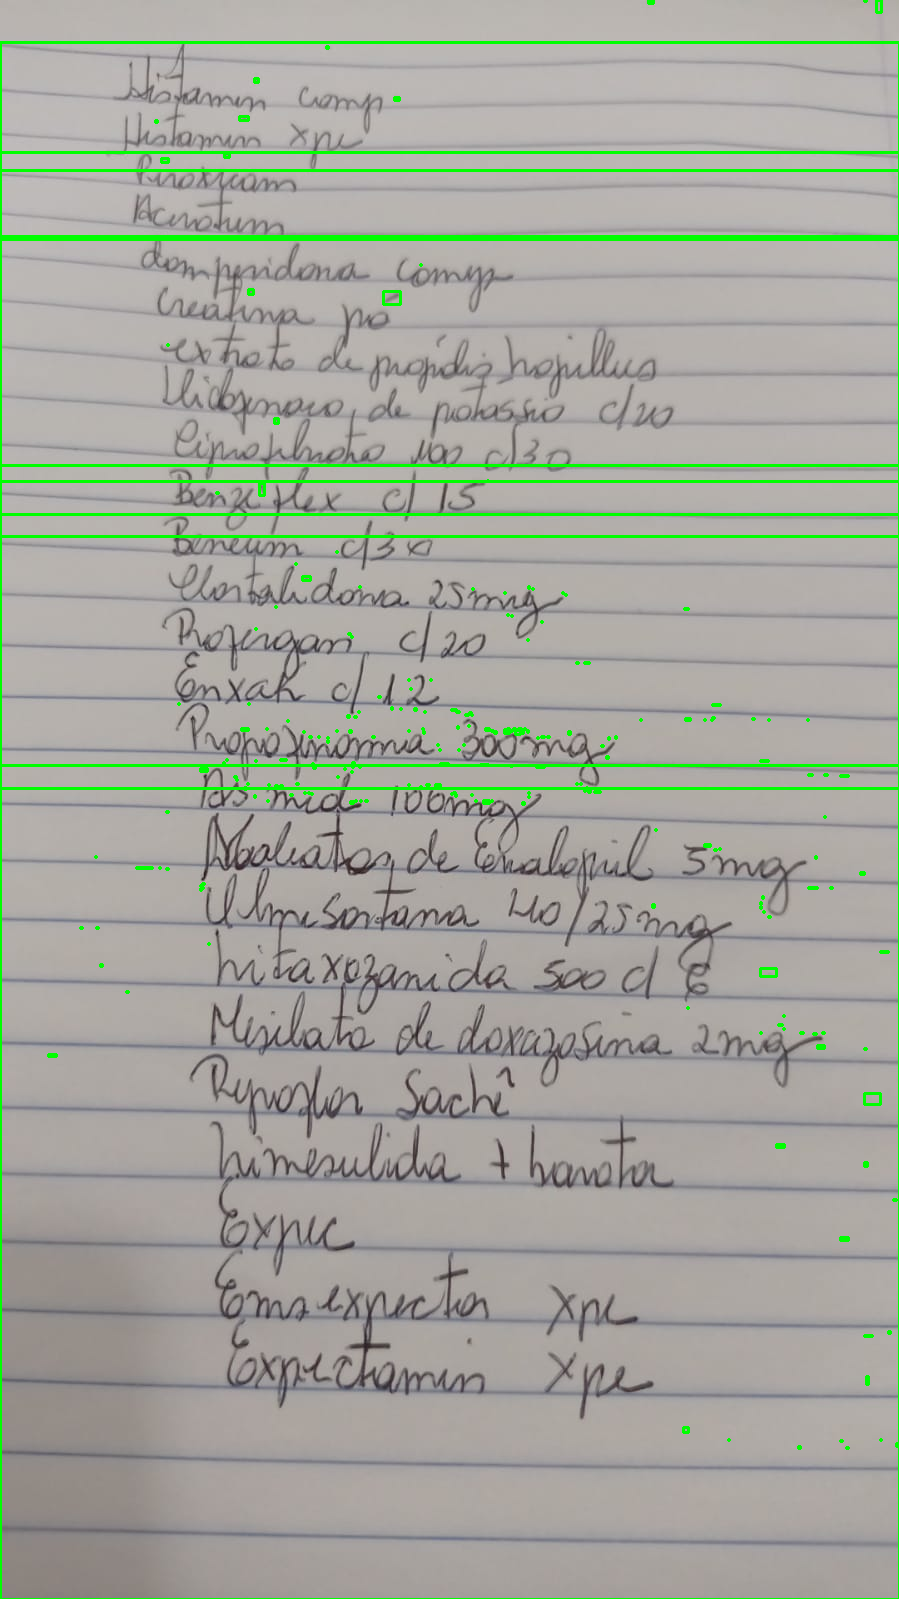

In [20]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/DataScience/OCR/example/lista.jpeg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization for contrast enhancement
equalized_image = cv2.equalizeHist(gray_image)

# Apply adaptive thresholding to segment the text regions
_, binary_image = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Apply a closing operation to join nearby regions
kernel = np.ones((1, 3), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours from left to right and top to bottom
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])

# Iterate over the contours
for contour in contours:
    # Get the bounding rectangle coordinates of the contour
    x, y, width, height = cv2.boundingRect(contour)

    # Draw the bounding rectangle on the original image
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Extract the corresponding part of the image
    word = image[y:y+height, x:x+width]

# Show the image with the delimited words
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


When you change the kernel you can see rectangle selection variations.

We see that the last products on the list were not recognized as unique and were all placed in a single rectangle, however some of the first ones were identified and separated.